In [1]:
import tensorflow as tf
import utils

from CRNN import CRNN

In [2]:
# model = CRNN()
# model.build_graph(1)

In [3]:
ckpt_states = tf.train.get_checkpoint_state(utils.CRNN_CHECKPOINT_DIR)
ckpt = ckpt_states.model_checkpoint_path
ckpt

'./checkpoint/crnn/crnn-model-53928'

In [17]:
with tf.gfile.GFile('./checkpoint/crnn/frozen_model_e9.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Graph().as_default() as graph:
    tf.import_graph_def(graph_def, name='CRNN')

x = graph.get_tensor_by_name('CRNN/inputs:0')
y = graph.get_tensor_by_name('CRNN/CTCBeamSearchDecoder:1')
seq_len = graph.get_tensor_by_name('CRNN/sequence_length:0')

In [81]:
import matplotlib.pyplot as plt
from DataManager import resize_image
import numpy as np

file_name = './dataset/custom/047.png'

img_arr = resize_image(file_name)
inputs = np.swapaxes(img_arr, axis1=0, axis2=1)
inputs = np.reshape(inputs, [1, 512, 32, 1])
inputs.shape

(1, 512, 32, 1)

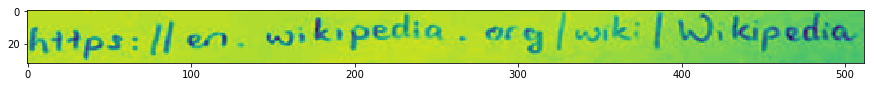

In [82]:
def plot_image(img):
    plt.figure(figsize=(15,40))
    plt.imshow(img)
    plt.show()
    
plot_image(img_arr)

In [12]:
from PIL import Image, ImageEnhance

def enhance_image(img_path, brightness, contrast, sharpness):
    image = Image.open(img_path)
    
    brightness_enhancer = ImageEnhance.Brightness(image)
    brightened = brightness_enhancer.enhance(brightness)
    
    contrast_enhancer = ImageEnhance.Contrast(brightened)
    contrasted = contrast_enhancer.enhance(contrast)
    
    sharpness_enhancer = ImageEnhance.Sharpness(contrasted)
    sharped = sharpness_enhancer.enhance(sharpness)
    
    return sharped

In [72]:
# a = enhance_image(file_name, 1.4, 2, 2)
# a.save('./dataset/custom/08a.png')
# a

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


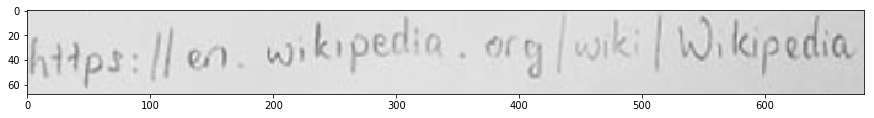

Attpailt en witepetia, ag wte) Wrtepedia


In [83]:
from scipy.misc import imread

with tf.Session(graph=graph) as sess:
    y_out = sess.run(y, feed_dict={
        x: inputs,
        seq_len: [127]
    })
    
img = imread(file_name)
plt.figure(figsize=(15,40))
plt.imshow(img)
plt.show()

print(utils.decode_result(y_out))